<a href="https://colab.research.google.com/github/Nickguild1993/machine_learning_models/blob/main/Cleaning_Lasso_Ridge_XGBoost_Regression_MachineLearning_Fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import dependencies (think of them as packages in R, or tools in a toolbelt)
# when you import a library, you can assign it a shorthand term- numpy *as np*
# that way, when you're using functions in those libraries, you can use the the 
# short hand version instead of the full name of the imported library.
# example: df = pandas.dataframe(my_list) vs df= pd.dataframe(my_list)

# I find it to be a best practice to import all the libraries that you plan to use
# in one code block, so that it's easy to keep track of what you've loaded in
# in addition to giving the reader a heads up about what to expect

import numpy as np
import pandas as pd
import random as rand

# visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

# this is an example of a "magic function" in python.  
%matplotlib inline


In [ ]:
# Bring in Scale function, Counter, Label encoder *Expand on this?*
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [ ]:
# import the machine learning model from the sci-kit learn library

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor

# the below import allows you to set your training data-the data you "train" your model on, 
# and the "test" data, which is used for actually running your model

#*********GO OVER******

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [ ]:
# importing the dependencies/packages/libraries for calculating the performance metrics of the models

from sklearn import metrics
import math
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2



In [ ]:

# import fish dataset

from google.colab import files
uploaded = files.upload()

Saving Fish.csv to Fish.csv


In [ ]:
# read in data and set it as a DataFrame (tabular data format akin to an excel table)

import io
df= pd.read_csv(io.BytesIO(uploaded["Fish.csv"]))

# df = dataframe
df.head()
# .head() gives you the first 5 values

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# get an overview of the data using value counts

df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

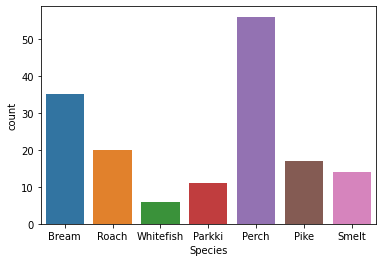

In [ ]:
# Visualizing species counts

sns.countplot(x= df.Species)


In [ ]:
# Check for missing values

df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [ ]:
# getting the shape of the dataset

df.shape
# rows by columns

(159, 7)

In [ ]:
# summary stats for numeric columns

df.describe()


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
# renaming Length1, Length2, Length3 columns for clarity 

df.rename(columns={"Length1" : "Body Height", "Length2" : "Total Length", "Length3" : "Diagonal Length"}, inplace=True)


In [ ]:
# checking the renamed columns

# using .sample(n) in place of .head() or .tail()

df.sample(5)

,Species,Weight,Body Height,Total Length,Diagonal Length,Height,Width
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
49,Roach,161.0,22.0,23.4,26.7,6.9153,3.6312
12,Bream,500.0,29.1,31.5,36.4,13.7592,4.3680
84,Perch,125.0,19.0,21.0,22.5,5.6925,3.6675
92,Perch,150.0,20.5,22.5,24.0,6.7920,3.6240


In [ ]:
# Label encoding so that fish species is numeric

label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])
# used bracket notation here, but you can also use . notation interchangeably 
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Name: Species, Length: 159, dtype: int64

In [ ]:
# re-check dataframe to ensure that encoding worked on the whole df
df.sample(3)

,Species,Weight,Body Height,Total Length,Diagonal Length,Height,Width
115,2,690.0,34.6,37.0,39.3,10.5717,6.3666
102,2,300.0,25.2,27.3,28.7,8.3230,5.1373
16,0,700.0,30.4,33.0,38.3,14.8604,5.2854


,Species,Weight,Body Height,Total Length,Diagonal Length,Height,Width
Species,1.000000,-0.312960,-0.266696,-0.283601,-0.335519,-0.698193,-0.397578
Weight,-0.312960,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Body Height,-0.266696,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Total Length,-0.283601,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Diagonal Length,-0.335519,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,-0.698193,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,-0.397578,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


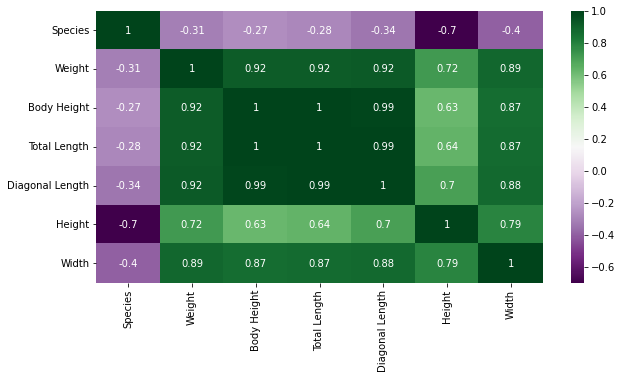

In [ ]:
# checking the pearson correlation between variables
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c, cmap="PRGn", annot=True)
# cmap is the color map, annot is annotation- if you want displayed numeric values within each cell.
c


As you can see, species does not correlate strongly to any of the features, however, their is indeed a strong correlation between the weight/height/length features.

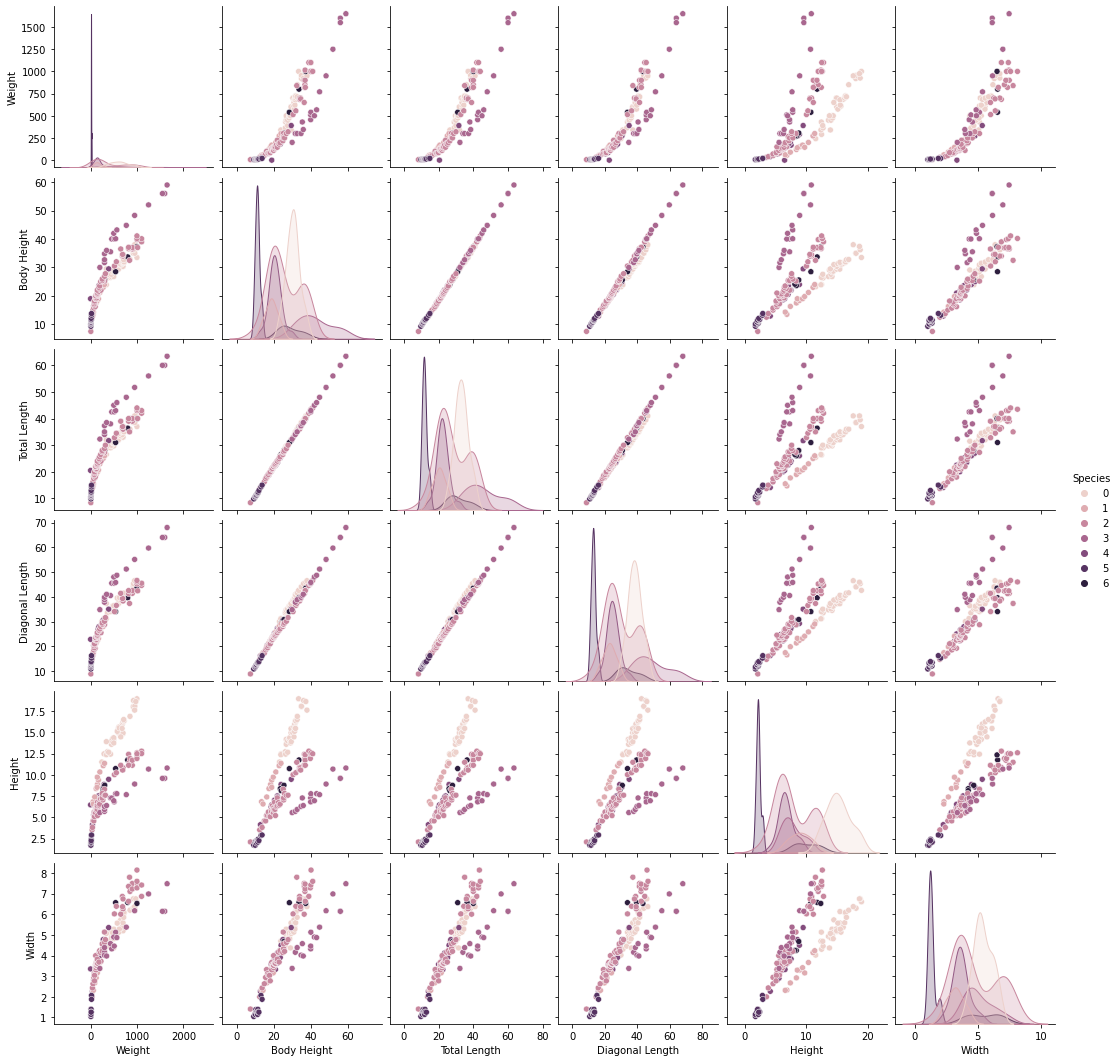

In [ ]:
# using seaborn (aliased as sns) to get a pairplot of the data.

sns.pairplot(df, hue="Species")
# seaborn has alot of similarities to GGplot in R.

# using "hue" = x allows you to differentiate values by selecting which column 
# should be used for color encoding.  

## **Preparing the data for training and testing**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(df[["Species"]]).toarray()
df_ohe = pd.DataFrame(feature_array, columns=ohe.categories_)
df = df.drop("Species", axis=1)

In [ ]:
df = pd.concat([df, df_ohe], axis=1)

In [ ]:
y = df.Weight
X = df.drop("Weight", axis=1)

In [ ]:
# test_size = .25 means that we're allocating 75% of the data for training and 25% for testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state=1)

In [ ]:
scaler = StandardScaler()

#s_ -> scaler to alias
s_X_train = scaler.fit_transform(X_train)
s_X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print(s_X_train.shape, s_X_test.shape, y_train.shape, y_test.shape)

(119, 12) (40, 12) (119,) (40,)


In [ ]:
lr = LinearRegression()
lr.fit(s_X_train, y_train)

LinearRegression()

In [ ]:
y_preds = lr.predict(s_X_test)
y_preds

array([ 779.04032013,  108.62581854,  545.28683462,  198.21796768,
         81.17135065,  596.1090241 ,  120.13940827,  489.74924376,
         68.5550115 ,  247.16647257,  180.28035345,  220.1235605 ,
       -175.12474408,  369.87803219,  715.99625801,  185.83730694,
        190.11107598,  529.95650098,  468.75431181,  307.89764007,
          3.6026835 , -170.54971444,  249.54901269,  491.6038444 ,
        148.17290618,  831.868842  ,  584.26099424,  -83.32916618,
       1301.07448585,  204.40675762, 1017.70241883,  369.28291226,
        676.54903832,  368.02333972,  516.02466245,  358.89373988,
        139.28892201,  275.43533842,  905.03305968,  351.98456516])

In [ ]:
# using the dependencies (i.e. libaries/packages) loaded at the top for analysis


rmse_lr = math.sqrt(mse(y_preds, y_test))
print("The root mean square error is :", rmse_lr)

The root mean square error is : 103.4360110163208


In [ ]:
# Mean absolute error (MAE)

mae_lr = mae(y_preds, y_test)
print("The mean absolute error is: ", mae_lr)

The mean absolute error is:  83.71289368436477


In [ ]:
# mean_squared_error

mse_lr = mse(y_preds, y_test)
print("The mean squared error is: ", mse_lr)

The mean squared error is:  10699.008374968438


In [ ]:
r2_lr = r2(y_preds, y_test)
print("The r-squared value is: ", r2_lr)

The r-squared value is:  0.8914250887901165


In [ ]:
# XGBoost (Decision tree ensemble with gradient boosting)

xgbr = XGBRegressor(verbosity=0)
xgbr.fit(X_train, y_train)





XGBRegressor(verbosity=0)

In [ ]:
y_predX = xgbr.predict(X_test)

In [ ]:
# MAE / MSE / RMSE 

# Root mean square error
rmse_X = math.sqrt(mse(y_predX, y_test))
# mean square error
mse_X = rmse_X ** 2
# mean absolute error
mae_X = mae(y_predX, y_test)
# r squared
r2_X = r2(y_predX, y_test)

# output these values 
print(f' For the XGBRegressor, the values are- rmse: {round(rmse_X,3)}, the mse is: {round(mse_X,3)}, the mae is: {round(mae_X,3)}, the r2 is: {round(r2_X,3)} ')



 For the XGBRegressor, the values are- rmse: 52.35, the mse is: 2740.521, the mae is: 33.751, the r2 is: 0.977 


In [ ]:
# ****LASSO REGRESSION*****

lasso_reg = Lasso(alpha=0.1, tol=0.03)
lasso_reg.fit(s_X_train, y_train)
y_preds_lasso = lasso_reg.predict(s_X_test)

In [ ]:
# Lasso Metrics
rmse_ls = math.sqrt(mse(y_preds_lasso, y_test))
mse_ls = rmse_ls ** 2
mae_ls = mae(y_preds_lasso, y_test)
r2_ls = r2(y_preds_lasso, y_test)

In [ ]:
# Lasso Metrics Print

print(f' For the Lasso Regression method, the values are- rmse: {round(rmse_ls, 3)}, mse: {round(mse_ls,3)}, mae: {round(mae_ls,3)}, r2: {round(r2_ls,3)}')

 For the Lasso Regression method, the values are- rmse: 103.806, mse: 10775.674, mae: 77.61, r2: 0.89


In [ ]:
# Comparision of the three different models - Linear Reg / XGBoost / Lasso

# Making a dataframe (table) of the models, with the metric type as the column headers.

models = ["Linear Regression", "XGBoost", "Lasso"]

rmse_scores = [rmse_lr, rmse_X, rmse_ls]
mse_scores = [mse_lr,mse_X, mse_ls]
mae_scores = [mae_lr, mae_X, mae_ls]
r2_scores = [r2_lr, r2_X, r2_ls]

# putting together the dataframe
output_df = pd.DataFrame(list(zip(models, rmse_scores, mse_scores, mae_scores, r2_scores)), 
                         columns = ["Model Name", "RMSE Score", "MSE Score", "MAE Score", "R^2 Coeff"])
output_df

,Model Name,RMSE Score,MSE Score,MAE Score,R^2 Coeff
0,Linear Regression,103.436011,10699.008375,83.712894,0.891425
1,XGBoost,52.349983,2740.520705,33.751070,0.976861
2,Lasso,103.805943,10775.673706,77.610402,0.890118


Looking at the the R squared coefficients, the XGBoost is by far the best fitting model, followed by Lasso and simple Linear Regression - which are neck and neck with each other.